In [97]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [98]:
train_data = pd.read_csv('train_data.csv')

In [99]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [100]:
train_data.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,4a122afe-6e52-4ed0-840d-66155da95ba1,2259.833995,67.884986,1058.573968,31.799362,99.017120,10.507787,0.315652,0.982880,3328.915749,100.741860,0.009926,10.527076,162.288927,2.216132,1.159926,2,interruption,838.975695,849.175170,114.996772,14.882619,14.882567,7.726918,72.947850,8.400000,0.133333,-0.812408,-0.156490,-0.000055,-0.000191,0.017395,0.007729,0.007729,2.250533,-0.812408,-0.156490
1,0848f722-52ec-420c-adb1-a1e90a2e2709,2430.367576,60.980572,1541.466293,38.677070,99.122594,13.644635,0.342359,0.877406,3985.478504,112.972337,0.008852,14.835317,152.245797,2.126010,1.232957,2,interruption,964.732045,980.847435,108.163925,20.973316,20.973307,5.157216,63.063063,24.400000,1.200000,0.014594,-0.595771,-0.000035,-0.000671,0.021513,0.011262,0.011262,1.910181,0.014594,-0.595771
2,7814286a-f939-45a7-8620-82b339a7ad4b,989.800997,27.651929,2478.164707,69.232133,95.693128,111.535043,3.115939,4.306872,3579.500746,22.218709,0.045007,15.405956,106.656796,2.198231,1.206519,2,interruption,729.175886,722.561420,76.200445,21.780192,21.780044,3.498612,83.191736,26.933333,1.000000,-0.470107,0.170303,0.000080,-0.001355,0.029976,0.015781,0.015781,1.899494,-0.470107,0.170303
3,de843d67-0ed3-4dfe-af91-78923dc31810,2025.914557,57.014236,1464.561241,41.216368,95.883762,62.872820,1.769396,4.116238,3553.348618,23.294028,0.042929,11.700872,141.610726,2.157575,1.150596,2,no stress,757.208837,765.360295,100.475142,16.542014,16.542012,6.073936,80.828414,8.733333,2.133333,0.176038,-0.506675,0.000024,0.000587,0.023851,0.011562,0.011562,2.062848,0.176038,-0.506675
4,ba117ec1-3de8-4da3-a315-4c7716589439,1576.443907,71.274370,619.624143,28.014521,97.524479,15.728281,0.711109,2.475521,2211.796331,39.395541,0.025384,8.309474,138.558148,2.076715,1.180381,2,interruption,798.549633,798.013775,98.151434,11.747680,11.747450,8.354963,76.299115,3.266667,0.000000,0.410326,0.208714,-0.000109,-0.000151,0.014282,0.007043,0.007043,2.027828,0.410326,0.208714


In [101]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               5000 non-null   object 
 1   VLF                5000 non-null   float64
 2   VLF_PCT            5000 non-null   float64
 3   LF                 5000 non-null   float64
 4   LF_PCT             5000 non-null   float64
 5   LF_NU              5000 non-null   float64
 6   HF                 5000 non-null   float64
 7   HF_PCT             5000 non-null   float64
 8   HF_NU              5000 non-null   float64
 9   TP                 5000 non-null   float64
 10  LF_HF              5000 non-null   float64
 11  HF_LF              5000 non-null   float64
 12  SD1                5000 non-null   float64
 13  SD2                5000 non-null   float64
 14  sampen             5000 non-null   float64
 15  higuci             5000 non-null   float64
 16  datasetId          5000 

In [102]:
train_data.describe()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2242.846274,64.618473,944.666618,33.756563,95.513467,39.787329,1.624964,4.486533,3227.300221,111.958521,0.049179,10.616818,155.627455,2.058517,1.181990,2.0,846.784823,841.682249,110.375627,15.010186,15.009439,7.442267,74.002691,9.885133,0.882307,0.564676,0.070378,5.114420e-07,-0.000448,0.018638,0.009758,0.009758,2.005098,0.564676,0.070378
std,1853.845285,16.858102,572.705322,16.121002,4.200091,46.887627,1.793648,4.200091,1957.986129,330.772146,0.050392,2.916761,109.574372,0.207399,0.062849,0.0,126.347739,134.461651,77.401898,4.123567,4.123548,5.091802,10.524966,8.156332,1.003129,1.738594,0.706996,1.662361e-04,0.000878,0.005468,0.003953,0.003953,0.378332,1.738594,0.706996
min,182.001656,19.492924,105.352082,2.218141,70.677164,0.063182,0.002234,0.013127,393.870306,2.410311,0.000131,3.926539,40.352502,0.436987,1.034281,2.0,549.441044,518.079375,28.675515,5.551126,5.551113,2.703858,48.743153,0.000000,0.000000,-1.851368,-2.130673,-1.049175e-03,-0.004361,0.008992,0.003645,0.003645,1.188950,-1.851368,-2.130673
25%,1009.686180,52.998781,547.027436,21.775991,93.560684,10.946137,0.347487,1.241594,1863.994785,14.529600,0.012572,8.388822,90.621161,2.023393,1.138994,2.0,759.378406,753.676954,64.386659,11.859738,11.859628,4.528817,66.614393,3.800000,0.000000,-0.347156,-0.340853,-7.130486e-05,-0.000911,0.014335,0.006999,0.006999,1.744527,-0.347156,-0.340853
50%,1705.183308,66.792593,779.619006,31.364370,96.583947,24.939947,1.023576,3.416053,2826.860362,28.273553,0.035369,10.191891,117.989810,2.130527,1.173954,2.0,824.282170,820.709035,83.801885,14.409668,14.408702,5.973518,74.166648,7.533333,0.533333,0.065799,-0.042454,1.639271e-06,-0.000297,0.017363,0.008766,0.008766,1.936696,0.065799,-0.042454
75%,2678.847972,77.328811,1199.089822,44.458585,98.758406,45.549542,2.276872,6.439316,4085.011726,79.541694,0.068825,12.701351,171.466298,2.181395,1.223631,2.0,924.941102,918.349305,121.531942,17.956454,17.956430,8.093998,80.473692,13.533333,1.466667,0.782407,0.342719,6.955046e-05,0.000161,0.021882,0.011538,0.011537,2.220642,0.782407,0.342719
max,12278.649761,97.703187,3211.424686,77.507972,99.986873,359.927420,12.533266,29.322836,13119.276456,7617.164272,0.414884,18.831610,791.751073,2.234600,1.357168,2.0,1321.857001,1653.122250,559.881621,26.623217,26.623033,53.153231,113.178390,39.200000,5.133333,16.367846,3.626919,9.518686e-04,0.002038,0.036017,0.026660,0.026660,3.676899,16.367846,3.626919


In [103]:
train_data.drop(['uuid' , 'datasetId'], axis=1, inplace=True)

In [104]:
train_data.isna().sum()

VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
condition            0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
dtype: int64

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data = train_data.apply(le.fit_transform)

<Axes: >

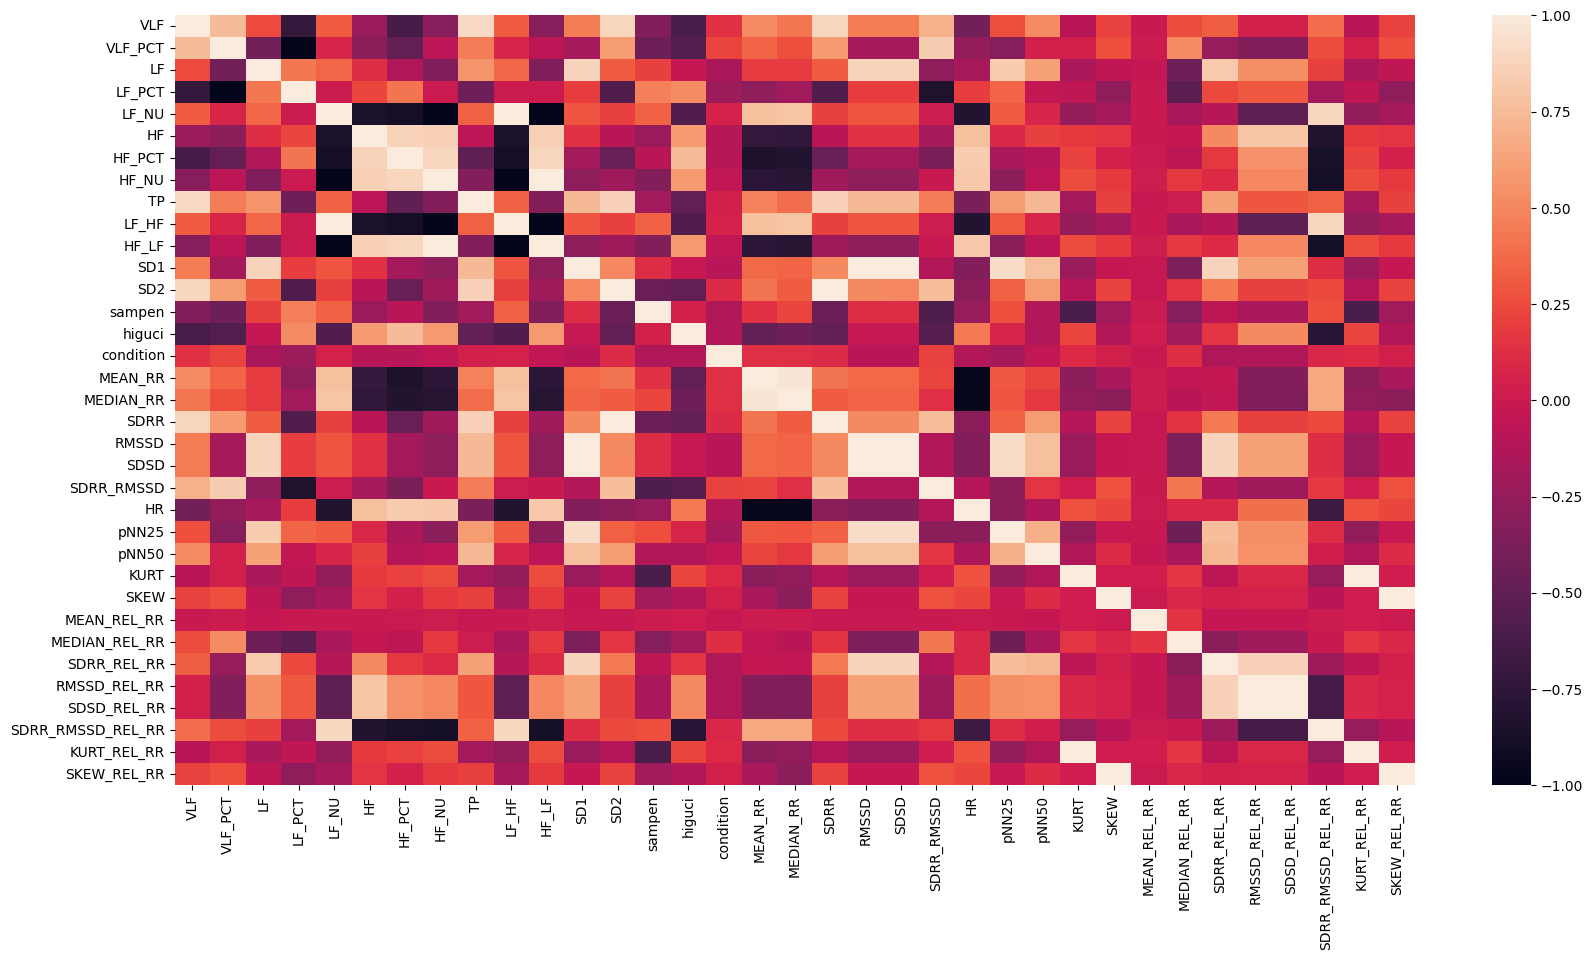

In [106]:
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(train_data.corr())

according to the correlational heatmap we can drop some few more columns as well


In [107]:
train_data.drop(['SDRR' , 'RMSSD' , 'SDSD' , 'SDRR_RMSSD' , 'MEDIAN_REL_RR' , 'SDRR_REL_RR' , 'RMSSD_REL_RR' , 'SDSD_REL_RR' , 'SDRR_RMSSD_REL_RR' , 'KURT_REL_RR' , 'SKEW_REL_RR' , 'HF_LF'] , axis=1 , inplace=True)

In [108]:
train_data.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,SD1,SD2,sampen,higuci,condition,MEAN_RR,MEDIAN_RR,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR
0,3292,2594,3428,2540,3965,1217,1160,1034,3098,3965,2715,3602,4522,2051,0,2727,2699,2312,124,2,306,1950,1470
1,3500,1922,4264,3261,4057,1475,1234,942,3677,4057,4487,3431,2333,3990,0,4127,3884,781,359,18,2361,624,1806
2,1206,93,4872,4907,2020,4526,4181,2979,3354,2020,4654,2073,4081,3316,0,785,728,4165,397,15,891,3360,3903
3,2969,1555,4173,3515,2100,4158,3435,2899,3331,2100,3240,3196,2927,1732,1,1210,1299,3801,129,32,2765,813,2972
4,2279,2933,1677,2105,3010,1707,1970,1989,1753,3010,1210,3099,1682,2715,0,2022,1918,2971,47,0,3259,3479,867


In [109]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data = sc.fit_transform(train_data)


In [110]:
train_data[0]

array([ 0.54906012,  0.06547152,  0.64328368,  0.02805922,  1.0153282 ,
       -0.88854208, -0.92803284, -1.0153282 ,  0.41465297,  1.0153282 ,
        0.14930278,  0.76383442,  1.58430149, -0.31072992, -1.34840561,
        0.15761663,  0.31672946, -0.12990381, -0.17717893, -0.74793577,
       -1.51970141, -0.38070478, -0.71325854])

In [111]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(train_data , train_data , test_size=0.2 , random_state=0)


In [112]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100 , random_state=0)
regressor.fit(X_train , y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)
print("accuracy percentage of random forest regressor is : " , r2_score(y_test , y_pred)*100 , "%")

accuracy percentage of random forest regressor is :  97.33866515658084 %
